# Сборный проект №1

# Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

## Раздел 1. Общая информация

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st
import string
path = '/datasets/' # было нужно при работе из разных ОС, сейчас это рудимент
df = pd.read_csv(path + 'games.csv')
display(df.head())
df.info()
# Напишем функцию которая будет подписывать название графика и оси абсцис и ординат, соответственно
# В качестве начальных данных передадим пустые строки, что б не было ошибок при задании только одного параметра
def name_it (title='', xlabel='', ylabel=''):
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [2]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Перед нами датасет из 16715 строк с столбцами:

   * `Name` — название игры
   * `Platform` — платформа
   * `Year_of_Release` — год выпуска
   * `Genre` — жанр игры
   * `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
   * `EU_sales` — продажи в Европе (миллионы проданных копий)
   * `JP_sales` — продажи в Японии (миллионы проданных копий)
   * `Other_sales` — продажи в других странах (миллионы проданных копий)
   * `Critic_Score` — оценка критиков (максимум 100)
   * `User_Score` — оценка пользователей (максимум 10)
   * `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
    
В столбце Rating буквы означают:

   * `«EC»` («Early childhood») — «Для детей младшего возраста»
   * `«E»`(«Everyone») — «Для всех»
   * `«E10+»` («Everyone 10 and older») — «Для всех от 10 лет и старше»
   * `«T»` («Teen») — «Подросткам»
   * `«M»` («Mature») — «Для взрослых»:
   * `«AO»` («Adults Only 18+») — «Только для взрослых»
   * `«RP»` («Rating Pending») — «Рейтинг ожидается»

Название столбцов написано с большой буквы, присутствует верблюжий регистр.

Столбец с годом релиза типа float, хотя год это целочисленное значение.

Данные, которыми заполнены категориальные столбцы, заполнены так же с заглавных букв и имеют верблюжий регистр.

Имеются пропуски в столбцах с оценкой игры и её рейтингом.

## Раздел 2. Преобработка данных

In [3]:
# Переведем всё в нижний регистр и посмотрим что получилось
df.columns = df.columns.str.lower()
cat_columns = ['name', 'platform', 'genre', 'rating']
for column in cat_columns:
    df[column] = df[column].str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [4]:
# Посмотрим чем заполнены столбцы с категориальными данными
for column in cat_columns:
    if column != 'name':   # столбец с названием игры брать пока не будем
        display(column, df[column].unique())

'platform'

array(['wii', 'nes', 'gb', 'ds', 'x360', 'ps3', 'ps2', 'snes', 'gba',
       'ps4', '3ds', 'n64', 'ps', 'xb', 'pc', '2600', 'psp', 'xone',
       'wiiu', 'gc', 'gen', 'dc', 'psv', 'sat', 'scd', 'ws', 'ng', 'tg16',
       '3do', 'gg', 'pcfx'], dtype=object)

'genre'

array(['sports', 'platform', 'racing', 'role-playing', 'puzzle', 'misc',
       'shooter', 'simulation', 'action', 'fighting', 'adventure',
       'strategy', nan], dtype=object)

'rating'

array(['e', nan, 'm', 't', 'e10+', 'k-a', 'ao', 'ec', 'rp'], dtype=object)

In [5]:
len(df['name'].unique())

11560

In [6]:
# в столбце "rating" есть старое обозначение "k-a", теперь это просто "е"
df['rating'] = df['rating'].replace('k-a', 'e')

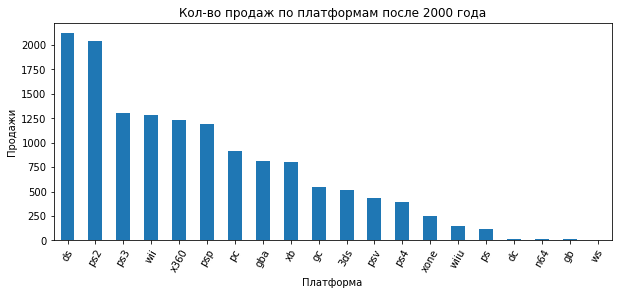

In [7]:
df.query('year_of_release > 2000')['platform'].value_counts().plot(kind='bar', rot=60, figsize=(10, 4))
name_it('Кол-во продаж по платформам после 2000 года', 'Платформа', 'Продажи')

In [8]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

### Обработка пропусков

In [9]:
# так же я не смогу определить ESRB, даже при переходе от платформы к платформе игра может быть изменена
# и получить другой рейтинг, по-этому пропуски в столбце 'rating' заменяю на rp
df['rating'] = df['rating'].fillna(value='rp')

In [10]:
# Аналогично этой замене значения tbd в столбце 'user_score' заменим на nan,
# так как у нас это численный столбец.
df['user_score'] = df['user_score'].replace('tbd', np.nan)

In [11]:
# Пропуски в столбце с годом в кол-ве 269 штук
# составляют примерно 1.5% от общего числа записей...
# Их удаление существенно не изменит результаты исследований
df = df.query('year_of_release > 0')
# Так же сразу переведем столбец 'year_of_release' в целочисленный тип
df['year_of_release'] = df['year_of_release'].astype('int')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16446 non-null object
year_of_release    16446 non-null int64
genre              16444 non-null object
na_sales           16446 non-null float64
eu_sales           16446 non-null float64
jp_sales           16446 non-null float64
other_sales        16446 non-null float64
critic_score       7983 non-null float64
user_score         7463 non-null object
rating             16446 non-null object
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


In [13]:
# переведем столбец user_score из типа 'object' в тип 'float'
df['user_score'] = df['user_score'].astype('float')

In [14]:
# по выбранным столбцам посмотрим наличие дубликатов
df[df[['genre', 'year_of_release', 'name', 'platform']].duplicated()].sort_values(by='name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16230,madden nfl 13,ps3,2012,sports,0.0,0.01,0.00,0.0,83.0,5.5,e
14244,NaN,gen,1993,NaN,0.0,0.00,0.03,0.0,NaN,NaN,rp


In [15]:
# Посути у нас 1 дубликат с названием и 1 без названия игры
# Посмотрим с названием
df.query('name == "madden nfl 13"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
507,madden nfl 13,x360,2012,sports,2.53,0.15,0.0,0.17,81.0,5.8,e
604,madden nfl 13,ps3,2012,sports,2.11,0.22,0.0,0.23,83.0,5.5,e
3986,madden nfl 13,wii,2012,sports,0.47,0.00,0.0,0.03,NaN,7.3,e
5887,madden nfl 13,psv,2012,sports,0.28,0.00,0.0,0.02,63.0,7.3,e
7066,madden nfl 13,wiiu,2012,sports,0.21,0.00,0.0,0.02,75.0,6.7,e
16230,madden nfl 13,ps3,2012,sports,0.00,0.01,0.0,0.00,83.0,5.5,e


In [16]:
# Коли он один, можно и ручками убрать
df = df[df.index != 16230]

In [17]:
# поправить индексацию
df = df.reset_index(drop=True)

In [18]:
# посмотрим на дубликат без названия
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
652,NaN,gen,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,rp
14022,NaN,gen,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,rp


In [19]:
# однозначно сказать что это одна и та же игра не получится, а незаполненость остальных
# столбцов как то не оставляет выбора
df = df.dropna(axis=0, subset=['name']).reset_index(drop=True)

### Посчитаем суммарные продажи

In [20]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [21]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

### Вывод по разделу 2

1. Пропуски в столбце с рейтингом ESRB (`rating`) заменены на значение `rp`
2. Значение `tdb` в столбце с оценками пользователей (`user_score`) заменено на `nan`
3. Строчки с пропущенными значениями в столбце `year_of_release` удалены
4. Столбец `user_score` переведен из типа <i>object</i> в тип <i>float</i>
5. Столбец `year_of_release` приведен к целочисленному типу
6. Удалены дубликаты
7. Добавлен столбец `total_sales` суммарных продаж

## Раздел 3. Исследовательский анализ

### Выбор актуального периода

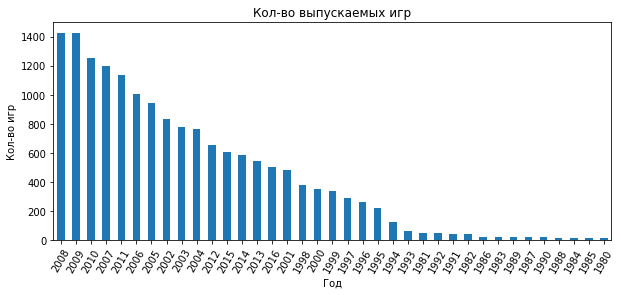

In [22]:
# Посмотрим сколько игр выпускалось в разные годы
df['year_of_release'].value_counts().plot(kind='bar', rot=60, figsize=(10, 4))
name_it('Кол-во выпускаемых игр', 'Год', 'Кол-во игр')
plt.show()

Начиная с 1993 года кол-во выпускаемых игр начало существенно увеличиваться

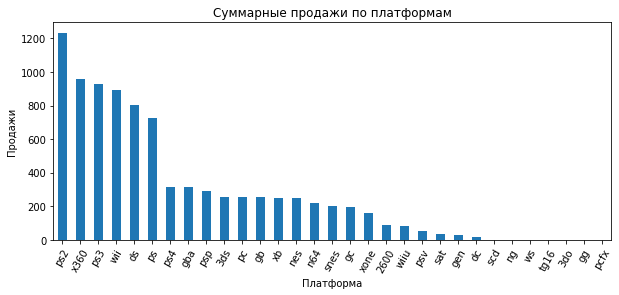

In [23]:
# Посмотрим суммарные продажи по платформам
df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).plot(kind='bar', rot=60, figsize=(10, 4))
name_it('Суммарные продажи по платформам', 'Платформа', 'Продажи')
plt.show()

У нас появились лидеры продаж за всё время, это: ps2, x360, ps3, wii, ds и ps

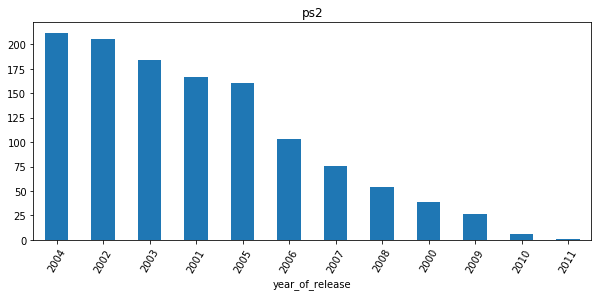

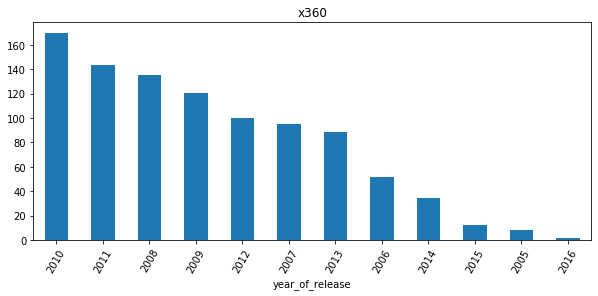

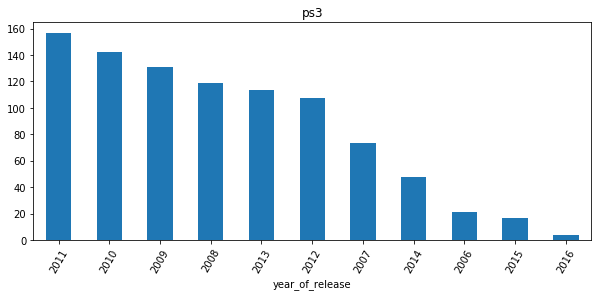

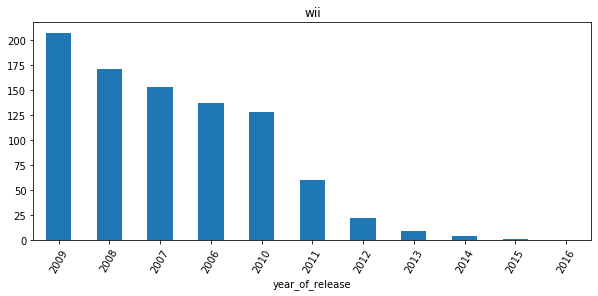

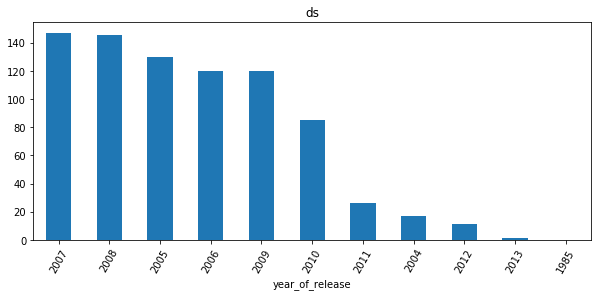

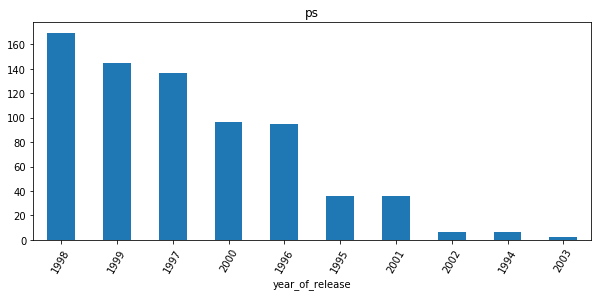

In [24]:
# посмотрим как на популярных платформах шли продажи игр
pop_platform = ['ps2', 'x360', 'ps3', 'wii', 'ds', 'ps']
for plat in pop_platform:
    display(df.query('platform == @plat').groupby('year_of_release')['total_sales'].sum().sort_values(ascending=False).plot(kind='bar', rot=60, figsize=(10, 4), title=plat))
    plt.show()

Получается, что платформа в плане продаж популярна в течении примерно 5-6 лет, после выхода на рынок, далее идёт спад продаж. При чём она не всегда "хорошо" стартует, довольно частое явление, что в 1-ый год выхода продаж не так много. Последнее может быть обусловлено, к примеру, что выход консоли пришёлся не на начало года. По этому для прогноза продаж имеет смысл выбирать платформы, на которые игры появились от 1 до 4 лет назад. И если уж сегодня 2016, то посмотрим данные с 2013 года.

### Выбор потенциально прибольных платформ

In [25]:
# Создадим датасэт с актуальным периодом
df_must_pop = df.query('year_of_release > 2012 ').copy()
df_must_pop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16442
Data columns (total 12 columns):
name               2233 non-null object
platform           2233 non-null object
year_of_release    2233 non-null int64
genre              2233 non-null object
na_sales           2233 non-null float64
eu_sales           2233 non-null float64
jp_sales           2233 non-null float64
other_sales        2233 non-null float64
critic_score       991 non-null float64
user_score         1192 non-null float64
rating             2233 non-null object
total_sales        2233 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 226.8+ KB


Осталось не так много записей, зато практически пропали пропуски

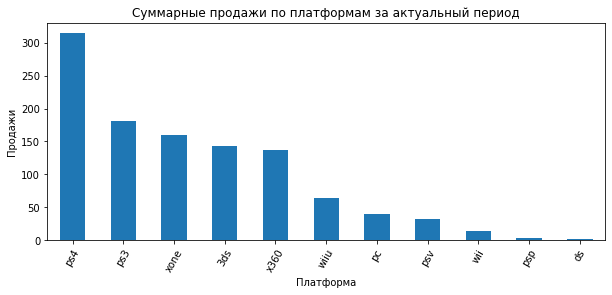

In [26]:
# Посмотрим продажи по платформам
df_must_pop.groupby('platform')['total_sales'].sum().sort_values(ascending=False).plot(kind='bar', rot=60, figsize=(10, 4))
name_it('Суммарные продажи по платформам за актуальный период', 'Платформа', 'Продажи')

Лидируют по продажам следующие платфомы: `ps4`, `ps3`, `xone`, `3ds`, `x360`

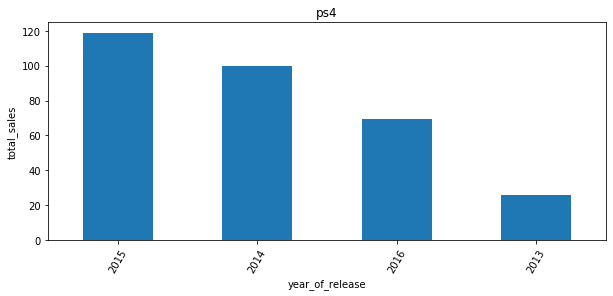

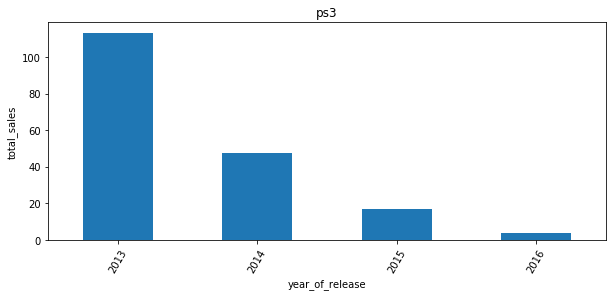

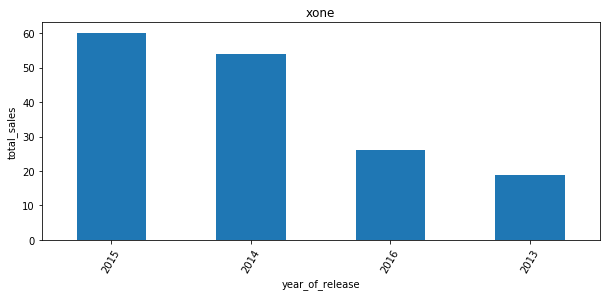

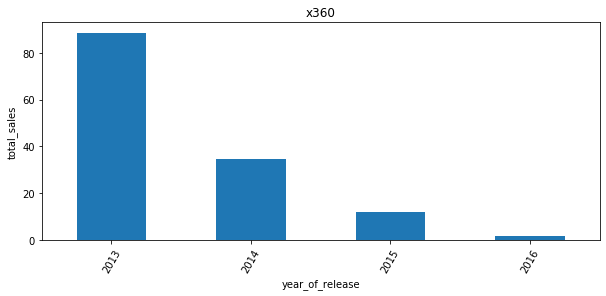

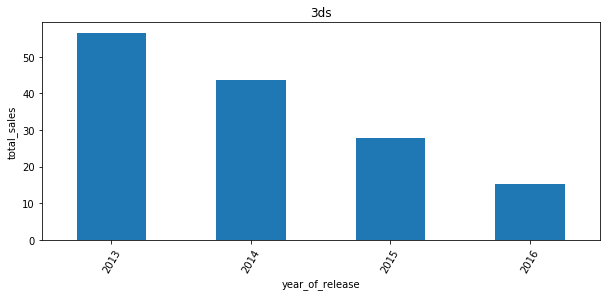

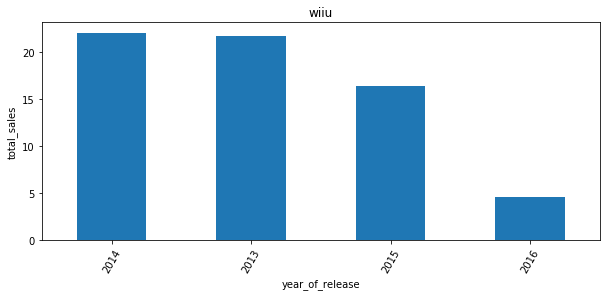

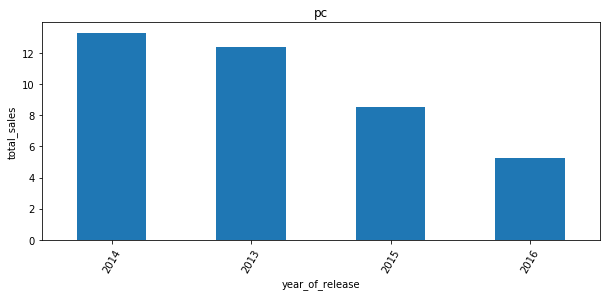

In [27]:
# Посмотрим как распределяются глобальные продажи за год по популярным платформам
must_pop_platform = ['ps4', 'ps3', 'xone', 'x360', '3ds', 'wiiu','pc']
for plat in must_pop_platform:
    (df_must_pop
     .query('platform == @plat')
     .groupby('year_of_release')['total_sales']
     .sum()
     .sort_values(ascending=False)
     .plot(kind='bar', rot=60, figsize=(10, 4), title=plat)
    )
    plt.ylabel('total_sales')
    plt.show()

Среди лидеров по продажам, растут продажи у: `ps4`,`xone`. Продажи падают у: `ps3`,`x360`,`3ds`,`wiiu`

Получается, что потенциально выгодные платформы это `ps4` и `xone`

### Изучение продаж по платформам

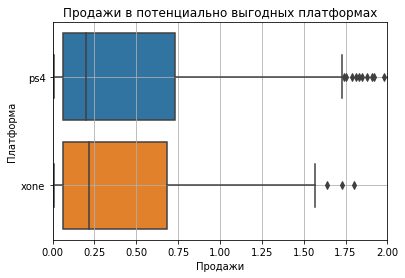

In [28]:
#Построим сиборновский "ящик с усами" по продажам в потенциально выгодных платформах
sns.boxplot(x=df_must_pop.query('platform == "ps4" or platform == "xone"')['total_sales'],
            y=df_must_pop.query('platform == "ps4" or platform == "xone"')['platform'],
            orient='h')
plt.xlim(0, 2)
plt.grid()
name_it('Продажи в потенциально выгодных платформах', 'Продажи', 'Платформа')
plt.show()

На графике, сгруппированном по платформам видно, что у платформы ps4 гораздо большое игр, чьи глобальные продажи существенно превосходят среднее значение глобальных продаж игр на платформе

#### Влияние оценок критиков и пользователей

In [29]:
# Из популярных платформ выберем ту, в которой пропусков в данных будет меньше от общего чилсла
df_ps4 = df_must_pop.query('platform == "ps4"').copy()

In [30]:
# Посмотрим корреляцию глобальных продаж и оценок критиков
df_ps4['total_sales'].corr(df_ps4['critic_score'])

0.406567902061781

In [31]:
# Посмотрим корреляцию глобальных продаж и оценок пользователей
df_ps4['total_sales'].corr(df_ps4['user_score'])

-0.031957110204556424

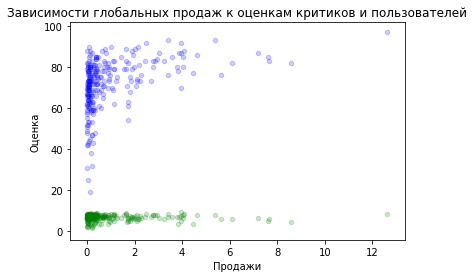

In [32]:
# Построим диаграму рассеяния зависимости глобальных продаж к оценкам критиков
# и зависимости глобальных продаж к оценкам пользователей
ax = df_ps4.plot(kind='scatter', x='total_sales', y='critic_score', color='b', alpha=0.2, legend=True)
df_ps4.plot(kind='scatter', x='total_sales', y='user_score', color='g', ax=ax, alpha=0.2)
plt.ylabel('score')
name_it('Зависимости глобальных продаж к оценкам критиков и пользователей', 'Продажи', 'Оценка')
plt.show()

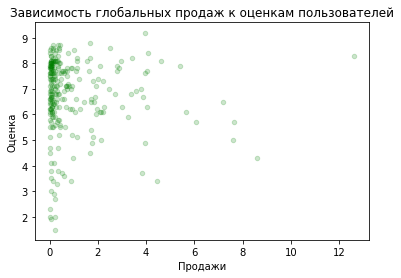

In [33]:
# Из-за большой разницы диапазонов предыдущая идея оказалась "так себе", для большей 
# понятности построим ещё одну диаграму рассеяния для зависимости глобальных
# продаж к оценкам пользователей
df_ps4.plot(kind='scatter', x='total_sales', y='user_score', color='g', alpha=0.2)
name_it('Зависимость глобальных продаж к оценкам пользователей', 'Продажи', 'Оценка')
plt.show()

Оценим корреляцию по таблице Чеддока для платформы ps4:
*  между глобальными продажами и оценками критиков корреляция "умеренная"
*  между глобальными продажами и оценками пользователей корреляция "слабая"

В целом на диаграммах рассеяния видно, что глобальные продажи сосредоточены в диапазоне оценок критиков от 60 до 90 по шкале от 0 до 100, в то время как для оценки пользователей используют практически весь доступный диапазон при шкале от 0 до 10.



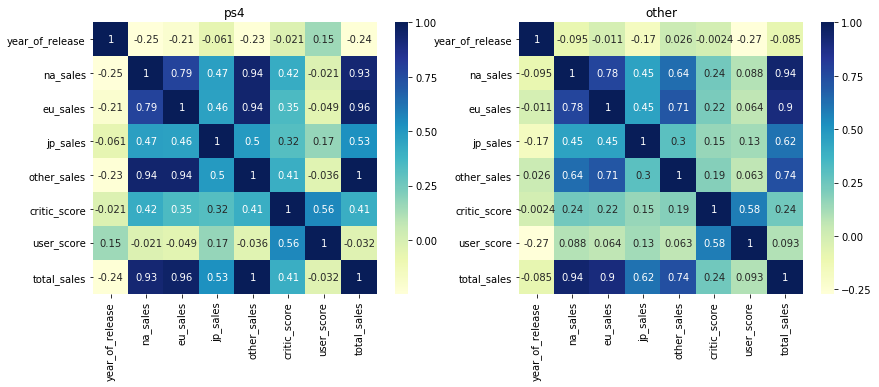

In [34]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
sns.heatmap(df_ps4.corr(), annot=True, cmap="YlGnBu", ax=ax1)
sns.heatmap(df.query('platform != "ps4"').corr(), annot=True, cmap="YlGnBu", ax=ax2)
ax1.title.set_text('ps4')
ax2.title.set_text('other')
plt.show()

На других платформах корреляция отзывов критиков и кол-ва продаж уменьшилась, корреляция отзывов пользователей и кол-ва продаж стала положительной, но так же вблизи нуля. Возможно это связано с тем, что критики специализируются на платформе. Опять же нельзя не отметить, что на оценке критиками "старых" игр нарабатывались критерии оценки. Игры становясь более разнообразными приобретали и всё больше формальных факторов оценки, что в результате позволило увеличить точность оценки критиками. В то время как оценка пользователей осталась исключительно субъективной, в плоть до того понравилась игра "да" - "нет".

#### Выбор прибыльных жанров

In [35]:
# Напишем функцию, которая принимая на входе датасет (data), его столбец для группировки (group), 
# его столбце, по которому будет считать кол-во значений (quantity) и его столбец, значения
# которого он будет складывать(value). Ну и при желании строить графики.
def profitable (data, group='genre', quantity='name', value='total_sales', plot=False):
    try:
        count = data.groupby(group)[quantity].count().to_frame().reset_index()
    except:
        print('Названия передаваемые в group и quantity не должны совпадать')
    try:
        sales = data.groupby(group)[value].sum().to_frame().reset_index()
    except:
        print('Названия передаваемые в group и reg_sales не должны совпадать')
    if plot:
        count.plot(kind='bar', rot=60, x=group, title='quantity', legend=False)
        name_it(('Кол-во выпускаемых игр по ' + group), group, value)
        sales.plot(kind='bar', rot=60, x=group, title='sales', legend=False)
        name_it(('Кол-во продаж игр по ' + group), group, value)
    stat = count.merge(sales, how='left', on=group)
    return stat

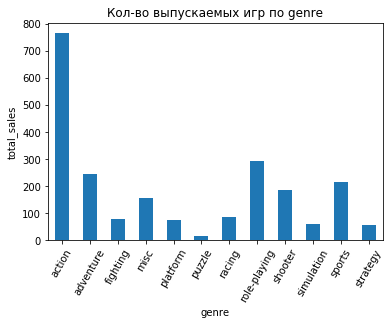

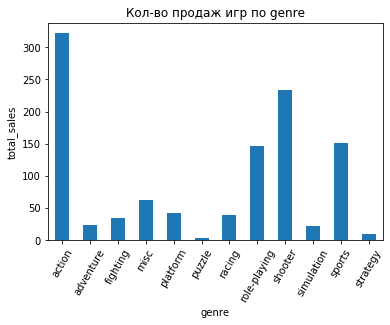

In [36]:
# применим её
genre_stat_total = profitable (data=df_must_pop, group='genre', quantity='name', value='total_sales', plot=True)

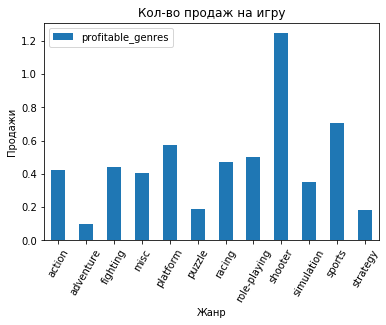

In [37]:
# Посчитаем сколько продаж приходится на одну игру, разделив общее кол-во продаж на кол-во игр
genre_stat_total['profitable_genres'] = genre_stat_total['total_sales'] / genre_stat_total['name']
genre_stat_total.plot(kind='bar', rot=60, x='genre', y='profitable_genres')
name_it('Кол-во продаж на игру', 'Жанр', 'Продажи')

Популярные жанры это: `action` `shooter` `sports` `role-playing`

Среди количества продаж на одну игру, беззаговорочный лидер -  жанр `shooter`, на втором месте - `sports`, третье место - `platform`, далее близки - `role-playing`, `racing`, `fighting`, `misc` и `action`. Их же можно считать наиболее прибыльными при прочих равных. Однако для точной оценки не хватает цены игры.

### Вывод по разделу 3

* Начиная с 1993 года кол-во выпускаемых игр начало существенно увеличиваться
* Лидерами продаж за всё время, оказались: `ps2`, `x360`, `ps3`, `wii`, `ds` и `ps`
* Платформа популярна в течении примерно 5-6 лет, после выхода на рынок, далее идёт спад продаж
* Для прогноза продаж выбран период с 2013 года
* Лидиры продаж следующие платфомы: `ps4`, `ps3`, `xone`, `3ds`, `x360`
* Среди лидеров по продажам, растут продажи у: `ps4`,`xone`
* Продажи падают у: `ps3`,`x360`,`3ds`,`wiiu`
* Потенциально выгодные платформы это `ps4` и `xone`
* У платформы `ps4` гораздо большое игр, чьи глобальные продажи существенно превосходят среднее значение глобальных продаж игр на платформе, в сравнении с `xone`
* Корреляция оценена по таблице Чеддока для платформы `ps4`:
    * между глобальными продажами и оценками критиков корреляция "умеренная"
    * между глобальными продажами и оценками пользователей корреляция "слабая"
* По диаграммам рассеяния установлено, что глобальные продажи сосредоточены в диапазоне оценок критиков от 60 до 90 по шкале от 0 до 100, в то время как для оценки пользователей используют практически весь доступный диапазон при шкале от 0 до 10
* На других платформах корреляция отзывов критиков и кол-ва продаж уменьшилась, корреляция отзывов пользователей и кол-ва продаж стала положительной, но так же вблизи нуля
* Популярные жанры это: `action` `shooter` `sports` `role-playing`

## Раздел 4. Портрет пользователя региона

### Популярные платформы по региону

In [38]:
# Посчитаем популярные платформы по региону
# Графики пока выключаем, для сравнения будет не удобно
na_platform = profitable(data=df_must_pop.query('na_sales > 0'),
                     group='platform', quantity='name', value='na_sales')
eu_platform = profitable(data=df_must_pop.query('eu_sales > 0'),
           group='platform', quantity='name', value='eu_sales')
jp_platform = profitable(data=df_must_pop.query('jp_sales > 0'),
           group='platform', quantity='name', value='jp_sales')

In [39]:
# Напишем ещё одну функцию, которая соберет полученные на преведущем шаге данные
# в один датасет
def get_reg_stats (data, column, reg1_stats, reg2_stats, reg3_stats):
    stats = data[column].value_counts().to_frame().reset_index()
    stats = stats.rename(columns={'index':column, column:'count'})
    stats = stats.merge(reg1_stats, how='left', on=column, suffixes=('_x','_z'))
    stats = stats.merge(reg2_stats, how='left', on=column, suffixes=('_c','_v'))
    stats = stats.merge(reg3_stats, how='left', on=column, suffixes=('_b','_n'))
    return stats

In [40]:
# и применим её
regs_stats = get_reg_stats(df_must_pop, 'platform', na_platform, eu_platform, jp_platform)
regs_stats.head(3)

,platform,count,name_c,na_sales,name_v,eu_sales,name,jp_sales
0,ps4,392,294.0,108.74,290,141.09,223.0,15.96
1,psv,358,94.0,5.04,96,6.10,316.0,18.59
2,ps3,345,211.0,63.50,212,67.81,236.0,23.35


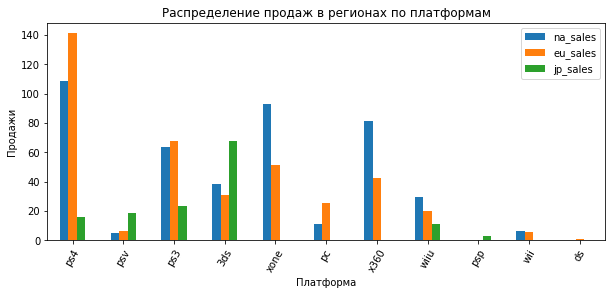

In [41]:
# Построим график распределения продаж в регионах по платформам
regs_stats.plot(kind='bar',
                x='platform',
                y=['na_sales', 'eu_sales', 'jp_sales'],
                rot=60,figsize=(10,4))
name_it('Распределение продаж в регионах по платформам', 'Платформа', 'Продажи')
plt.show()

Топ 5 продаваемых платформ с 2013 года получается следующий: ps4, xone, ps3, x360, 3ds.
Пользователи Северной Афмерики чаще покупали игры для ps4, на втором по популярности xone и x360, видимо жители страны-производителя так реализуют свои идеи патриотизма.
Пользователи европейского региона предпочитают платформу ps4 и ps3. А вот жители далёкой Японии, вопреки ожиданий выбирают 3ds, видимо за счёт её портативности)

### Популярные жанры по региону

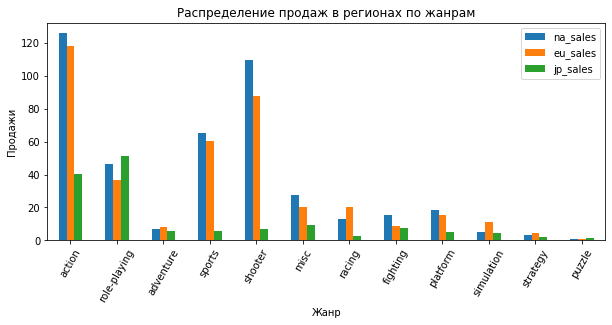

In [42]:
# для жанра делаем тоже самое
na_genre = profitable (data=df_must_pop.query('na_sales > 0'),
                     group='genre', quantity='name', value='na_sales', plot=False)
eu_genre = profitable(data=df_must_pop.query('eu_sales > 0'),
           group='genre', quantity='name', value='eu_sales', plot=False)
jp_genre = profitable(data=df_must_pop.query('jp_sales > 0'),
           group='genre', quantity='name', value='jp_sales', plot=False)
genre_stats = get_reg_stats(df_must_pop, 'genre', na_genre, eu_genre, jp_genre)
genre_stats.plot(kind='bar', x='genre', y=['na_sales', 'eu_sales', 'jp_sales'], rot=60,figsize=(10,4))
name_it('Распределение продаж в регионах по жанрам', 'Жанр', 'Продажи')
plt.show()

Топ 5 популярных жанров по регионам по убыванию:

* Северная Америка: `action`, `shooter`, `sports`, `role-playing`, `racing` \ `misc`

* Европейский регион: `action`, `shooter`, `sports`, `role-playing`, `misc`

* Япония: `role-playing`, `action`, `misc`, `fighting`, `shooter`

В плане предпочтений по жанрам Северная Америка и Европа похожи (совпадают первые 4-ре позиции), отлична от них Япония у которой на первом месте жанр `role-playing` и в топ-5 входит жанр `fighting`, вытеснив `sports`.

### Влияние возрастного рейтинга

Посмотрим влияние возрастного рейтинга для актуального периода исследования.

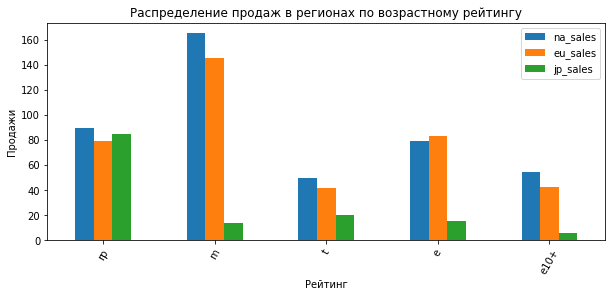

In [43]:
# повторяемся ещё один разок для рейтингов
na_rating = profitable(data=df_must_pop,
                     group='rating', quantity='name', value='na_sales')
eu_rating = profitable(data=df_must_pop,
                     group='rating', quantity='name', value='eu_sales')
jp_rating = profitable(data=df_must_pop,
                     group='rating', quantity='name', value='jp_sales')
genre_stats = get_reg_stats(df_must_pop, 'rating', na_rating, eu_rating, jp_rating)
genre_stats.plot(kind='bar', x='rating', y=['na_sales', 'eu_sales', 'jp_sales'], rot=60,figsize=(10,4))
name_it('Распределение продаж в регионах по возрастному рейтингу', 'Рейтинг', 'Продажи')
plt.show()

Популярность по возрастному рейтингу аналогична популярности по жанрам, в том плане, что Северная Америка и Европа снова близки по предпочтениям. Только в этот раз Япония оказалась совсем уж "далека". В Европе и Северной Америке преимущетвенно выбирают игры рейтинга `m` (для взрослых), так же пользуются популярностью игры рейтинга `e`(для детей), далее по популярности `e10+` и `t`. В Японии же, в основном продаются игры рейтинг которых только ожидается, среди уже получивших рейтинг лидируют по продажам игры рейтинга `t`(подросткам), второе место делят `e` и `m`.

### Вывод по разделу 4

* Топ 5 продаваемых платформ с 2013 года: `ps4`, `xone`, `ps3`, `x360`, `3ds`
* Пользователи Северной Афмерики чаще покупали игры для `ps4`, на втором по популярности `xone` и `x360`
* Пользователи Европейского региона предпочитают платформы `ps4` и `ps3`
* Пользователи Японии выбирают `3ds`
* Топ 5 популярных жанров по регионам по убыванию:
    * Северная Америка: `action`, `shooter`, `sports`, `role-playing`, `racing` \ `misc`
    * Европейский регион: `action`, `shooter`, `sports`, `role-playing`, `misc`
    * Япония: `role-playing`, `action`, `misc`, `fighting`, `shooter`
* В Европе и Северной Америке преимущетвенно выбирают игры рейтинга m (для взрослых), так же пользуются популярностью игры рейтинга e(для детей), далее по популярности e10+ и t
* В Японии же, в основном продаются игры рейтинг которых только ожидается, среди уже получивших рейтинг лидируют по продажам игры рейтинга t(подросткам), второе место делят e и m.

В общем японские игроки - это подростки "рубящиеся" на 3ds в симулятор свиданий или покемоны. А Европейцы-Американцы - более взрослые игроки сидящие с ps'ки в GTA, Watch Dogs, Battle Field, Call Of Duty и т.п. игры.

## Раздел 5. Проверка гипотез

### О пользовательских рейтингах платформ

Нулевая гипотеза звучит так:

•	Средние пользовательские рейтинги платформ <i>Xbox One</i> и <i>PC</i> одинаковые

Соответственно альтернативная гипотеза:

•	Средние пользовательские рейтинги платформ <i>Xbox One</i> и <i>PC</i> разные

Здесь я провожу исследование за выбранный много выше актуальный период.

In [44]:
# Для проверки гипотиз применим двусторонний ттест, так как рейтинги могут быть
# больше или меньше
interesed_score = round(df_must_pop.query('platform == "xone"')['user_score'].mean(), 2)
alpha = 0.05
results = st.ttest_1samp(round(df_must_pop[(df_must_pop['platform'] == 'pc')
                                           & (df_must_pop['user_score'].isna() == False)]['user_score']), interesed_score)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.07500684069580958
Не получилось отвергнуть нулевую гипотезу


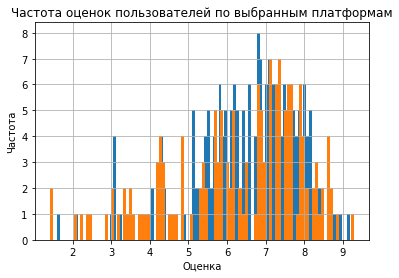

In [45]:
# Можно в рамках такого сравнения, можно для наглядности посмотреть частотную гистограмму
df_must_pop.query('platform == "xone"')['user_score'].hist(bins=100)
df_must_pop.query('platform == "pc"')['user_score'].hist(bins=100)
name_it('Частота оценок пользователей по выбранным платформам', 'Оценка', 'Частота')

Нулевая гипотеза подтвердилась, частотная диаграмма так же показала высокое совпадение.

### О пользовательских рейтингах жанров

Нулевая гипотеза звучит так:

•	Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») равные.

Альтернативная гипотеза:

•	Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Так же исследование проводится за актуальный период.

In [46]:
# так же для проверни гипотезы применяем двусторонний ттест
interesed_score = round(df_must_pop.query('genre == "action"')['user_score'].mean(), 2)
alpha = 0.05
results = st.ttest_1samp(round(df_must_pop[(df_must_pop['genre'] == 'sports')
                                           & (df_must_pop['user_score'].isna() == False)]['user_score']), interesed_score)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 9.942521972540758e-22
Отвергаем нулевую гипотезу


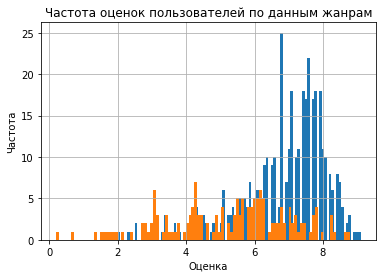

In [47]:
# Здесь получился противоположенный результат, посмотрим как он выглядит на частотной
# гистограмме
df_must_pop.query('genre == "action"')['user_score'].hist(bins=100)
df_must_pop.query('genre == "sports"')['user_score'].hist(bins=100)
name_it('Частота оценок пользователей по данным жанрам', 'Оценка', 'Частота')
plt.show()

Нулевая гипотеза в процессе исследования была отвергнута и, соответственно, принята альтернативная гипотеза.

### Вывод по разделу 5



* Проверка гипотизы в пункте 5.1 показала, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые
* Проверка гипотизы в п. 5.2 показала, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

## Общий вывод

В проекте были проводилось исследование по данным о продажах до 2016 года. Исходный датасет состоял из 16715 строк с столбцами содержащими количественные и категориальные данные.

Для исследования данные прошли предобработку:
- исправлен регистр в названиях столбцов и категориальных данных
- для части столбцов изменён тип данных, на более подходящий
- проведена обработка пропусков, включая категориальные столцы
- удалены дубликаты
- добавлен столбец `total_sales` суммарных продаж

Начиная с 1993 года кол-во выпускаемых игр начало существенно увеличиваться. Лидерами продаж за всё время, оказались: `ps2`, `x360`, `ps3`, `wii`, `ds` и `ps`. Для прогноза продаж выбран период с 2013 года, список лидеров продаж по платфомам в этот период: `ps4`, `ps3`, `xone`, `3ds`, `x360`. Растущими платформами оказались `ps4` и `xone` и были выбраны как потенциально выгодные.

Установлено связь глобальных продаж от оценок критиков, значительно более заметна, чем связь глобальных продаж и оценок пользователей.

Определены популярные жанры: `action` `shooter` `sports` `role-playing`.

Выбран актуальный период для исследования.

* Топ 5 продаваемых платформ с 2013 года: `ps4`, `xone`, `ps3`, `x360`, `3ds`
* Пользователи Северной Афмерики чаще покупали игры для `ps4`, на втором по популярности `xone` и `x360`
* Пользователи Европейского региона предпочитают платформы `ps4` и `ps3`
* Пользователи Японии выбирают `3ds`
* Топ 5 популярных жанров по регионам по убыванию:
    * Северная Америка: `action`, `shooter`, `sports`, `role-playing`, `racing` \ `misc`
    * Европейский регион: `action`, `shooter`, `sports`, `role-playing`, `misc`
    * Япония: `role-playing`, `action`, `misc`, `fighting`, `shooter`
* В Европе и Северной Америке преимущетвенно выбирают игры рейтинга `m` (для взрослых), так же пользуются популярностью игры рейтинга `e`(для детей), далее по популярности `e10+` и `t`
* В Японии же, в основном продаются игры рейтинг которых только ожидается, среди уже получивших рейтинг лидируют по продажам игры рейтинга `t`(подросткам), второе место делят `e` и `m`.

В общем японские игроки - это подростки "рубящиеся" на `3ds` в симулятор свиданий или покемоны. А Европейцы-Американцы - более взрослые игроки сидящие с `ps'ки` в GTA, Watch Dogs, Battle Field, Call Of Duty и т.п. игры.

* Гипотиза, что средние пользовательские рейтинги платформ <i>Xbox One</i> и <i>PC</i> одинаковые подтвердилась
* Гипотиза , что средние пользовательские рейтинги жанров <i>Action</i> (англ. «действие», экшен-игры) и <i>Sports</i> (англ. «спортивные соревнования») разные, так же подтвердилась.

Для сети магазинов распространённых по всему миру, необходим подход по региону. Предпочтения клиентов из Северной Америки и Европы похожи, а вот предпочтения Японцев значительно отличаются, как по выбранным платформам так и по жанрам.

Перед отправкой проекта выполнено: <i>Kernel -> Restart & Clear Output</i>, затем <i> Cell -> Run All </i>